In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/SimplyLearner/pandas_use_case/main/db_file.csv")

In [2]:
#Downloading and unzip the data
!wget https://www.dropbox.com/s/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip
!unzip "Pandas Data preprocessing.zip"
!rm "Pandas Data preprocessing.zip"

--2022-02-20 17:38:28--  https://www.dropbox.com/s/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip [following]
--2022-02-20 17:38:28--  https://www.dropbox.com/s/raw/c2927nzgomsn23f/Pandas%20Data%20preprocessing.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5ce2b94f7dcbc573ec5b36390f.dl.dropboxusercontent.com/cd/0/inline/BgFFTHjAqKGh6JCmc6qnP0lg508-TU3KR3VnElIk-56jaXKw7iA44tz7P_Y2w9KP4UnFTl-hLsnrhI7qvC9Ml_Z8iIbs3FE01LMbIfkuRpB7FHBbTFMX30cMzi6-jvX0PwSyn_hJsiQGpM4n4ukvCM4N/file# [following]
--2022-02-20 17:38:28--  https://uc5ce2b94f7dcbc573ec5b36390f.dl.dropboxusercontent.com/cd/0/inline/BgFFTHjAqKGh6JCmc6qnP0lg508

In [3]:
df.head()

Date  CustomerID  ...       Gender ShippingTime
0       16/08/20       10471  ...       Female         17.0
1  2/8/2020 0:00       10472  ...  Unspecified         12.0
2  8/8/2020 0:00       10473  ...          NaN         10.0
3            NaN       10474  ...       Female       2133.0
4       24/08/20       10475  ...         Male       2133.0

[5 rows x 6 columns]

In [4]:
df.to_csv("db_file.csv",index=False)

In [5]:
df2 = pd.read_excel("lcl_bello_sales.xlsx")

In [6]:
df2.head()

CustomerID                 Price
0       10471   ₹ 675036.2138626401
1       10472            € 2,315.53
2       10473     ₹ 611426.29122378
3       10474  ₹ 210869.48083470002
4       10475      ₹ 679422.2811434

In [7]:
#read from csv file
df3=pd.read_csv('https://raw.githubusercontent.com/SameerJain901/datasets/master/cld_bello_customers.csv')

In [8]:
df3.head()

CustomerID ProductType   Rating  Total_Ratings    PaymentMode
0       10471      coates  1 start           8736     Creditcard
1       10472    dresses    2 star           8547        Ewallet
2       10473         NaN   2 star           9833   Prepaid Card
3       10474    dresses     2star           7591  Directdeposit
4       10475      pantas  1 start           5131            NaN

In [9]:
df2.drop(columns="CustomerID",inplace=True)
df3.drop(columns="CustomerID",inplace=True)

In [10]:
data = pd.concat([df,df2,df3], axis=1)
data.head()

Date  CustomerID  ... Total_Ratings    PaymentMode
0       16/08/20       10471  ...          8736     Creditcard
1  2/8/2020 0:00       10472  ...          8547        Ewallet
2  8/8/2020 0:00       10473  ...          9833   Prepaid Card
3            NaN       10474  ...          7591  Directdeposit
4       24/08/20       10475  ...          5131            NaN

[5 rows x 11 columns]

In [11]:
data.to_csv("single_source.csv") # Raw data

In [12]:
data.duplicated().any()

True

In [13]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [14]:
data[data["CustomerID"] == 10471]

Date  CustomerID  PaymentMode  ...   Rating Total_Ratings  PaymentMode
0  16/08/20       10471   Creditcard  ...  1 start          8736   Creditcard

[1 rows x 11 columns]

In [15]:
data["CustomerID"] == 10471

0      True
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: CustomerID, Length: 100, dtype: bool

In [16]:
data[data.duplicated()]

Date  CustomerID  PaymentMode  ...  Rating Total_Ratings  PaymentMode
88  31/08/20       10558  Credit Card  ...  5 star          7007  Credit Card
89  31/08/20       10558  Credit Card  ...  5 star          7007  Credit Card

[2 rows x 11 columns]

In [17]:
data[data["CustomerID"] == 10558]

Date  CustomerID  PaymentMode  ...  Rating Total_Ratings  PaymentMode
87  31/08/20       10558  Credit Card  ...  5 star          7007  Credit Card
88  31/08/20       10558  Credit Card  ...  5 star          7007  Credit Card
89  31/08/20       10558  Credit Card  ...  5 star          7007  Credit Card

[3 rows x 11 columns]

In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data[data.duplicated()] # Duplicate entries have been removed

Empty DataFrame
Columns: [Date, CustomerID, PaymentMode, ShippingMode, Gender, ShippingTime, Price, ProductType, Rating, Total_Ratings, PaymentMode]
Index: []

## Box & Whisker Plot

https://students.flinders.edu.au/content/dam/student/slc/box-and-whisker-plots.pdf

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


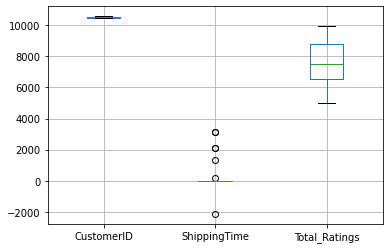

In [20]:
data.boxplot()

In [21]:
q1 = data["ShippingTime"].quantile(.25)
q3 = data["ShippingTime"].quantile(.75)
IQR = q3 - q1
IQR

9.0

In [22]:
q2 = data["ShippingTime"].median()
q2

13.0

In [23]:
# Outlier
# less than Q1-1.5*IQR
# more than Q3 + 1.5*IQR

outlier_lower = (data["ShippingTime"] < (q1 - 1.5 * IQR))
outlier_higher =  (data["ShippingTime"] > (q3 + 1.5 * IQR))
outlier = data[outlier_lower | outlier_higher]
outlier

Date  CustomerID  ... Total_Ratings     PaymentMode
3        NaN       10474  ...          7591   Directdeposit
4   24/08/20       10475  ...          5131             NaN
27  19/08/20       10498  ...          9297  Direct Deposit
43  14/08/20       10514  ...          5567     Credit Card
59  17/08/20       10530  ...          6930            Cash
71  20/08/20       10542  ...          9157            Cash
98  26/08/20       10569  ...          5200   Directdeposit

[7 rows x 11 columns]

In [24]:
outlier_higher

0     False
1     False
2     False
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: ShippingTime, Length: 98, dtype: bool

In [25]:
outlier.index

Int64Index([3, 4, 27, 43, 59, 71, 98], dtype='int64')

In [26]:
data.drop(outlier.index, axis = 0, inplace=True)

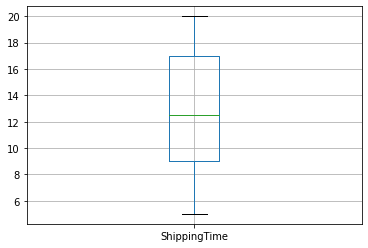

In [27]:
data.boxplot(column="ShippingTime")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


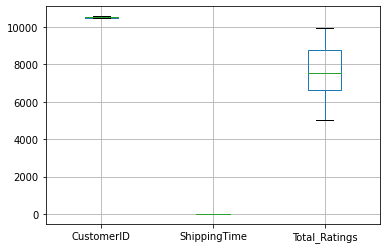

In [28]:
data.boxplot()

In [29]:
data.isna().any()

Date             False
CustomerID       False
PaymentMode       True
ShippingMode      True
Gender            True
ShippingTime      True
Price             True
ProductType       True
Rating            True
Total_Ratings    False
PaymentMode       True
dtype: bool

In [30]:
data.isnull().any()

Date             False
CustomerID       False
PaymentMode       True
ShippingMode      True
Gender            True
ShippingTime      True
Price             True
ProductType       True
Rating            True
Total_Ratings    False
PaymentMode       True
dtype: bool

In [31]:
data.isnull().sum()

Date             0
CustomerID       0
PaymentMode      5
ShippingMode     3
Gender           5
ShippingTime     1
Price            1
ProductType      4
Rating           6
Total_Ratings    0
PaymentMode      5
dtype: int64

In [32]:
!pip install missingno

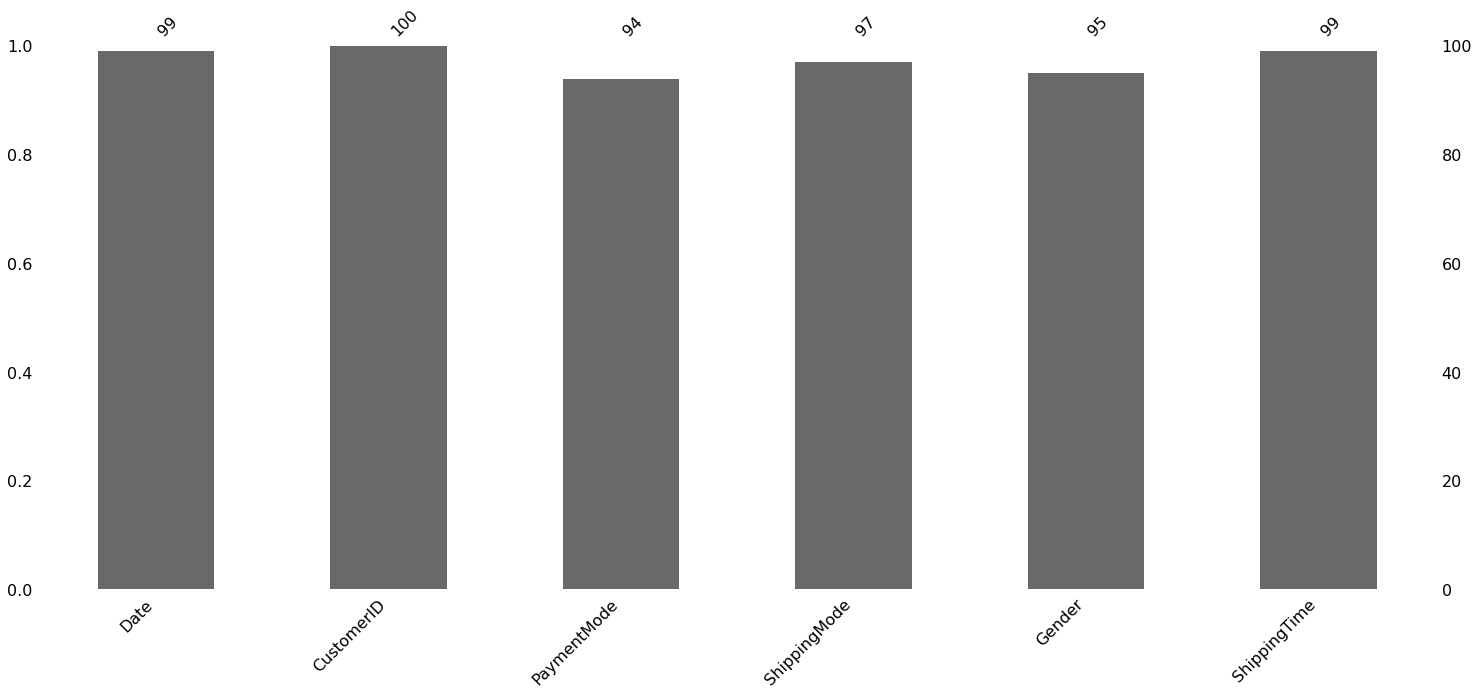

In [33]:
import missingno as mn
mn.bar(df)

In [34]:
data.head()

Date  CustomerID  ... Total_Ratings     PaymentMode
0       16/08/20       10471  ...          8736      Creditcard
1  2/8/2020 0:00       10472  ...          8547         Ewallet
2  8/8/2020 0:00       10473  ...          9833    Prepaid Card
5       28/08/20       10476  ...          5347  Direct Deposit
6  8/8/2020 0:00       10477  ...          9406  Direct Deposit

[5 rows x 11 columns]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    86 non-null     object 
 3   ShippingMode   88 non-null     object 
 4   Gender         86 non-null     object 
 5   ShippingTime   90 non-null     float64
 6   Price          90 non-null     object 
 7   ProductType    87 non-null     object 
 8   Rating         85 non-null     object 
 9   Total_Ratings  91 non-null     int64  
 10  PaymentMode    86 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 8.5+ KB


In [36]:
set(data["Gender"])

{'Female', 'Male', 'Unspecified', nan}

In [37]:
data["ProductType"] = data["ProductType"].fillna(data["ProductType"].mode()[0])
data["Gender"] = data["Gender"].fillna('Unspecified')
data["ShippingMode"] = data["ShippingMode"].fillna(data["ShippingMode"].mode()[0])
data["ShippingTime"] = data["ShippingTime"].fillna(data["ShippingTime"].mean())
data["Rating"] = data["Rating"].fillna(data["Rating"].mode()[0])

In [38]:
data.isnull().sum()

Date             0
CustomerID       0
PaymentMode      5
ShippingMode     0
Gender           0
ShippingTime     0
Price            1
ProductType      0
Rating           0
Total_Ratings    0
PaymentMode      5
dtype: int64

In [39]:
data.columns

Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime', 'Price', 'ProductType', 'Rating', 'Total_Ratings',
       'PaymentMode'],
      dtype='object')

In [40]:
data.columns = ['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime', 'Price', 'ProductType', 'Rating', 'Total_Ratings',
       'PaymentMode_2']

In [41]:
data.columns

Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime', 'Price', 'ProductType', 'Rating', 'Total_Ratings',
       'PaymentMode_2'],
      dtype='object')

In [42]:
data.drop(columns ='PaymentMode_2',inplace = True )
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           91 non-null     object 
 1   CustomerID     91 non-null     int64  
 2   PaymentMode    86 non-null     object 
 3   ShippingMode   91 non-null     object 
 4   Gender         91 non-null     object 
 5   ShippingTime   91 non-null     float64
 6   Price          90 non-null     object 
 7   ProductType    91 non-null     object 
 8   Rating         91 non-null     object 
 9   Total_Ratings  91 non-null     int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 7.8+ KB


In [43]:
data["PaymentMode"] = data["PaymentMode"].fillna(data["PaymentMode"].mode()[0])

In [44]:
data.isnull().sum()

Date             0
CustomerID       0
PaymentMode      0
ShippingMode     0
Gender           0
ShippingTime     0
Price            1
ProductType      0
Rating           0
Total_Ratings    0
dtype: int64

In [45]:
data["ProductType"].mode()

0    coates
dtype: object

Typing errors: 
- __coates__ should be _Coats/Jackets_
- __dresses__ should be _Dresses_
- __pantas__ should be _Pants_
- __Creditcard__ should be _Credit Card_
- __Directdeposit__ should be _Direct Deposit_
- __2star__ should be _2 star_

In [46]:
def payment(i):
  if i == "Creditcard":
    return "Credit Card"
  elif i == "Directdeposit":
    return "Direct Deposit"
  else:
    return i

def change_rating(i):
  if i == "2star":
    return "2 star"
  elif i == "1 start":
    return "1 star"
  else:
    return i  

In [47]:
def category(i):
  if i == "coates":
    return "Coats/Jackets"
  elif i == "pantas":
    return "Pants"
  elif i == "dresses ":
    return "Dresses"
  else:
    return i

In [48]:
data.columns

Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime', 'Price', 'ProductType', 'Rating', 'Total_Ratings'],
      dtype='object')

In [49]:
data["ProductType"] = data["ProductType"].apply(category)
data["PaymentMode"] = data["PaymentMode"].apply(payment)
data["Rating"] = data["Rating"].apply(change_rating)

In [50]:
set(data["Rating"])

{'1 star', '2 star', '3 star', '4 star', '5 star'}

In [51]:
data.head()

Date  CustomerID  ...  Rating Total_Ratings
0       16/08/20       10471  ...  1 star          8736
1  2/8/2020 0:00       10472  ...  2 star          8547
2  8/8/2020 0:00       10473  ...  2 star          9833
5       28/08/20       10476  ...  2 star          5347
6  8/8/2020 0:00       10477  ...  5 star          9406

[5 rows x 10 columns]

In [52]:
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   ShippingMode   91 non-null     object        
 4   Gender         91 non-null     object        
 5   ShippingTime   91 non-null     float64       
 6   Price          90 non-null     object        
 7   ProductType    91 non-null     object        
 8   Rating         91 non-null     object        
 9   Total_Ratings  91 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.8+ KB


In [54]:
#set()
data["ProductType"].unique()

array(['Coats/Jackets', 'Dresses', 'Jeans', 'Pants', 'Cardigan',
       'Shirts/Tops', 'Hats'], dtype=object)

In [55]:
data["ProductType"].nunique()

7

## Groupby

In [56]:
data["ShippingMode"].unique()

array(['Economy', 'Mail', 'Express', 'Normal'], dtype=object)

In [57]:
data.groupby("ShippingMode")["ShippingTime"].mean()

ShippingMode
Economy    15.176471
Express    12.310101
Mail       12.857143
Normal     11.583333
Name: ShippingTime, dtype: float64

In [58]:
data.groupby("ProductType")["ShippingTime"].mean()

ProductType
Cardigan         11.333333
Coats/Jackets    12.653846
Dresses          13.473684
Hats             13.000000
Jeans            11.200000
Pants            14.485185
Shirts/Tops      12.500000
Name: ShippingTime, dtype: float64

In [59]:
import numpy as np
data.groupby("ProductType")["ShippingTime"].agg([np.mean,max,min])

mean   max  min
ProductType                        
Cardigan       11.333333  16.0  6.0
Coats/Jackets  12.653846  20.0  5.0
Dresses        13.473684  20.0  5.0
Hats           13.000000  20.0  7.0
Jeans          11.200000  18.0  5.0
Pants          14.485185  20.0  9.0
Shirts/Tops    12.500000  20.0  5.0

In [60]:
data.head()

Date  CustomerID     PaymentMode  ...    ProductType  Rating  Total_Ratings
0 2020-08-16       10471     Credit Card  ...  Coats/Jackets  1 star           8736
1 2020-08-02       10472         Ewallet  ...        Dresses  2 star           8547
2 2020-08-08       10473    Prepaid Card  ...  Coats/Jackets  2 star           9833
5 2020-08-28       10476  Direct Deposit  ...  Coats/Jackets  2 star           5347
6 2020-08-08       10477  Direct Deposit  ...  Coats/Jackets  5 star           9406

[5 rows x 10 columns]

## Fixing Price Columns

In [61]:
def currency(i):
  if pd.isna(i):
    return ""
  elif "$" in i:
    return "American Dollar"
  elif "€" in i:
    return "Euro"
  elif '£' in i:
    return "British Pound"
  elif '₹' in i:
    return "Indian Rupee"
  else:
    return ""

In [62]:
data["currency"] = data["Price"].apply(currency)
data.head()

Date  CustomerID     PaymentMode  ...  Rating Total_Ratings       currency
0 2020-08-16       10471     Credit Card  ...  1 star          8736   Indian Rupee
1 2020-08-02       10472         Ewallet  ...  2 star          8547           Euro
2 2020-08-08       10473    Prepaid Card  ...  2 star          9833   Indian Rupee
5 2020-08-28       10476  Direct Deposit  ...  2 star          5347               
6 2020-08-08       10477  Direct Deposit  ...  5 star          9406  British Pound

[5 rows x 11 columns]

In [63]:
data["Price"] =  data["Price"].str.replace("$","")
data["Price"] =  data["Price"].str.replace("€","")
data["Price"] =  data["Price"].str.replace("£","")
data["Price"] =  data["Price"].str.replace("₹","")
data["Price"] =  data["Price"].str.replace(",","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [64]:
data.head()

Date  CustomerID     PaymentMode  ...  Rating Total_Ratings       currency
0 2020-08-16       10471     Credit Card  ...  1 star          8736   Indian Rupee
1 2020-08-02       10472         Ewallet  ...  2 star          8547           Euro
2 2020-08-08       10473    Prepaid Card  ...  2 star          9833   Indian Rupee
5 2020-08-28       10476  Direct Deposit  ...  2 star          5347               
6 2020-08-08       10477  Direct Deposit  ...  5 star          9406  British Pound

[5 rows x 11 columns]

In [65]:
data["Price"].fillna("0", inplace = True)

In [66]:
data.head()

Date  CustomerID     PaymentMode  ...  Rating Total_Ratings       currency
0 2020-08-16       10471     Credit Card  ...  1 star          8736   Indian Rupee
1 2020-08-02       10472         Ewallet  ...  2 star          8547           Euro
2 2020-08-08       10473    Prepaid Card  ...  2 star          9833   Indian Rupee
5 2020-08-28       10476  Direct Deposit  ...  2 star          5347               
6 2020-08-08       10477  Direct Deposit  ...  5 star          9406  British Pound

[5 rows x 11 columns]

In [67]:
data["Price"] = data["Price"].astype("float")

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   PaymentMode    91 non-null     object        
 3   ShippingMode   91 non-null     object        
 4   Gender         91 non-null     object        
 5   ShippingTime   91 non-null     float64       
 6   Price          91 non-null     float64       
 7   ProductType    91 non-null     object        
 8   Rating         91 non-null     object        
 9   Total_Ratings  91 non-null     int64         
 10  currency       91 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 8.5+ KB


In [69]:
#Rupee, Euro, Pound
erate = [0.013 , 1.13, 1.36]

In [70]:
df.shape

(100, 6)

In [71]:
data["currency"].unique()

array(['Indian Rupee', 'Euro', '', 'British Pound', 'American Dollar'],
      dtype=object)

In [72]:
price_dollar = []

for i in range(100):
  try:
    if data["currency"][i] == "Indian Rupee":
      price_dollar.append(data["Price"][i] * erate[0])
    elif data["currency"][i] == "British Pound":
      price_dollar.append(data["Price"][i] * erate[2])
    elif data["currency"][i] == "Euro":
      price_dollar.append(data["Price"][i] * erate[1])
    else:
      price_dollar.append(data["Price"][i])
  except KeyError:
    continue

In [73]:
df.shape

(100, 6)

In [74]:
data.index

Int64Index([ 0,  1,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73,
            74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 90, 91, 92,
            93, 94, 95, 96, 97, 99],
           dtype='int64')

In [75]:
data.shape

(91, 11)

In [76]:
type(price_dollar)

list

In [77]:
price_dollar

[8775.47078021432,
 2616.5489,
 7948.541785909139,
 0.0,
 8989.705488400003,
 4287.06,
 4093.8885892800004,
 5484714.810089821,
 4183.870199999999,
 7435.625999999999,
 6756.94,
 3148.65,
 9743.11,
 2979.2994275,
 35052410.59609624,
 1991.18,
 1976.822,
 6221.36,
 1710.9442999999997,
 5242.611973540002,
 8252.506552811821,
 7759.614588546079,
 4372.969745820001,
 6207.34532646,
 6569.096799999999,
 2296.4123650912597,
 21312321.13,
 7553.438065297279,
 5923.7086,
 1436.8872895681197,
 6267.6919,
 1024.64,
 4313.74,
 9842.09576252,
 1330.79956722414,
 2591.72,
 2826.03558943108,
 6688.69062774458,
 8058.069186940002,
 6930.87,
 1961.8038498200003,
 2180.45263125274,
 3124.78,
 3134.5069999999996,
 2073.8795592777597,
 1012.61,
 4231.5692928366,
 1813.71,
 8799.592656875018,
 5751.014554637819,
 2057.74730368,
 4182.18982137866,
 7881.24693156,
 4908.74851199304,
 8199.874084120001,
 6324.6777999999995,
 5393.9081,
 8607.472025960002,
 5771.30216921362,
 5484.387199999999,
 7072.56,
 583

In [78]:
data["price_dollar"] = price_dollar

In [79]:
data.head()

Date  CustomerID  ...       currency price_dollar
0 2020-08-16       10471  ...   Indian Rupee  8775.470780
1 2020-08-02       10472  ...           Euro  2616.548900
2 2020-08-08       10473  ...   Indian Rupee  7948.541786
5 2020-08-28       10476  ...                    0.000000
6 2020-08-08       10477  ...  British Pound  8989.705488

[5 rows x 12 columns]

In [80]:
data.columns

Index(['Date', 'CustomerID', 'PaymentMode', 'ShippingMode', 'Gender',
       'ShippingTime', 'Price', 'ProductType', 'Rating', 'Total_Ratings',
       'currency', 'price_dollar'],
      dtype='object')

In [81]:
data = data[['Date','CustomerID','ProductType','Rating', 'Total_Ratings','Gender', 'PaymentMode', 'ShippingMode',
             'ShippingTime', 'Price','currency', 'price_dollar']]

In [82]:
data.head()

Date  CustomerID  ...       currency price_dollar
0 2020-08-16       10471  ...   Indian Rupee  8775.470780
1 2020-08-02       10472  ...           Euro  2616.548900
2 2020-08-08       10473  ...   Indian Rupee  7948.541786
5 2020-08-28       10476  ...                    0.000000
6 2020-08-08       10477  ...  British Pound  8989.705488

[5 rows x 12 columns]

In [83]:
# data.columns = [] # Assign new columns

In [84]:
data.rename(columns = {"ProductType":"Product_Type"},inplace = True)

In [85]:
data.head()

Date  CustomerID  ...       currency price_dollar
0 2020-08-16       10471  ...   Indian Rupee  8775.470780
1 2020-08-02       10472  ...           Euro  2616.548900
2 2020-08-08       10473  ...   Indian Rupee  7948.541786
5 2020-08-28       10476  ...                    0.000000
6 2020-08-08       10477  ...  British Pound  8989.705488

[5 rows x 12 columns]

In [86]:
data.rename(columns = {"Product_Type":"ProductType"},inplace = True)
data.head()

Date  CustomerID  ...       currency price_dollar
0 2020-08-16       10471  ...   Indian Rupee  8775.470780
1 2020-08-02       10472  ...           Euro  2616.548900
2 2020-08-08       10473  ...   Indian Rupee  7948.541786
5 2020-08-28       10476  ...                    0.000000
6 2020-08-08       10477  ...  British Pound  8989.705488

[5 rows x 12 columns]

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 99
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           91 non-null     datetime64[ns]
 1   CustomerID     91 non-null     int64         
 2   ProductType    91 non-null     object        
 3   Rating         91 non-null     object        
 4   Total_Ratings  91 non-null     int64         
 5   Gender         91 non-null     object        
 6   PaymentMode    91 non-null     object        
 7   ShippingMode   91 non-null     object        
 8   ShippingTime   91 non-null     float64       
 9   Price          91 non-null     float64       
 10  currency       91 non-null     object        
 11  price_dollar   91 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 11.3+ KB


# Label Encoder

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [89]:
le.fit(data["Rating"]) # Learn from data

LabelEncoder()

In [90]:
le.classes_

array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype=object)

In [91]:
le.transform(data["Rating"])  # to change the data on basis of learning

array([0, 1, 1, 1, 4, 0, 3, 0, 1, 4, 3, 0, 0, 0, 1, 4, 3, 0, 0, 3, 3, 1,
       3, 3, 0, 3, 0, 3, 2, 3, 0, 2, 1, 0, 3, 0, 0, 3, 1, 0, 3, 2, 4, 1,
       1, 3, 3, 0, 0, 2, 4, 1, 0, 0, 1, 0, 1, 4, 3, 4, 0, 1, 1, 3, 0, 4,
       3, 0, 1, 3, 2, 2, 2, 4, 1, 4, 2, 3, 0, 0, 0, 4, 0, 1, 2, 1, 0, 1,
       4, 2, 0])

In [92]:
data["Rating"]

0     1 star
1     2 star
2     2 star
5     2 star
6     5 star
       ...  
94    1 star
95    2 star
96    5 star
97    3 star
99    1 star
Name: Rating, Length: 91, dtype: object

In [93]:
data["Rating_Encoded"] = le.transform(data["Rating"])
data.head()

Date  CustomerID  ... price_dollar Rating_Encoded
0 2020-08-16       10471  ...  8775.470780              0
1 2020-08-02       10472  ...  2616.548900              1
2 2020-08-08       10473  ...  7948.541786              1
5 2020-08-28       10476  ...     0.000000              1
6 2020-08-08       10477  ...  8989.705488              4

[5 rows x 13 columns]

In [94]:
le.classes_

array(['1 star', '2 star', '3 star', '4 star', '5 star'], dtype=object)

In [95]:
le.inverse_transform([4])

array(['5 star'], dtype=object)

In [96]:
le.fit_transform(data["ShippingMode"])

array([0, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 3, 2,
       2, 1, 1, 0, 2, 3, 3, 1, 3, 0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 3, 3, 3,
       3, 3, 3, 2, 1, 3, 0, 3, 2, 0, 2, 3, 0, 3, 3, 2, 1, 3, 1, 3, 1, 0,
       2, 2, 1, 1, 1, 2, 2, 3, 3, 1, 1, 0, 2, 3, 1, 3, 2, 1, 2, 3, 2, 1,
       3, 3, 2])

In [97]:
from sklearn.preprocessing import OneHotEncoder

In [98]:
ohe = OneHotEncoder()

In [99]:
# data = np.array(["Male","Male","Female"])
# ohe.fit(data.reshape(-1,1))

In [100]:
ohe.transform(data.reshape(-1,1)).toarray()

AttributeError: ignored

In [101]:
pd.get_dummies(data, columns= ["ProductType"])

Date  CustomerID  ... ProductType_Pants  ProductType_Shirts/Tops
0  2020-08-16       10471  ...                 0                        0
1  2020-08-02       10472  ...                 0                        0
2  2020-08-08       10473  ...                 0                        0
5  2020-08-28       10476  ...                 0                        0
6  2020-08-08       10477  ...                 0                        0
..        ...         ...  ...               ...                      ...
94 2020-08-23       10565  ...                 0                        0
95 2020-08-04       10566  ...                 0                        0
96 2020-08-16       10567  ...                 0                        0
97 2020-08-25       10568  ...                 1                        0
99 2020-08-29       10570  ...                 0                        0

[91 rows x 19 columns]